# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

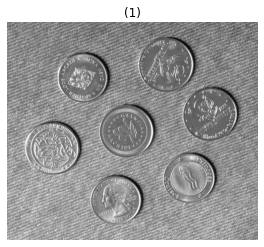

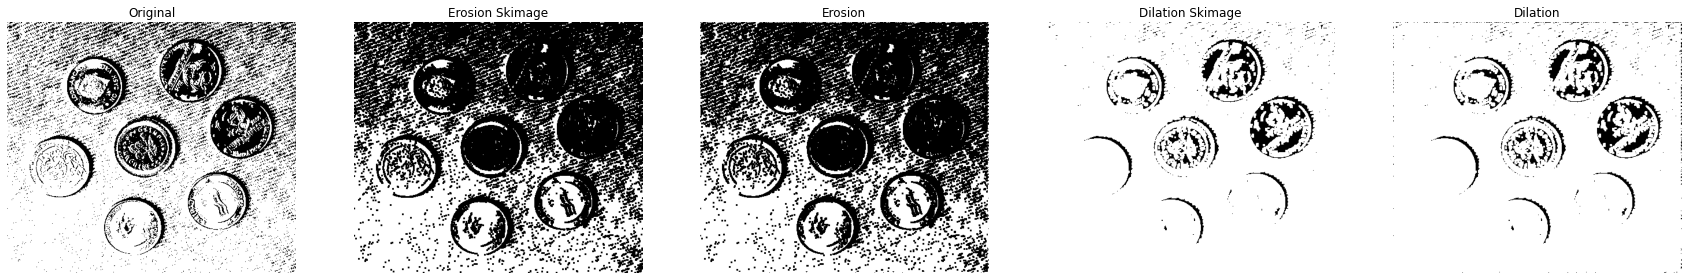

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def erosion(img, size=3):
    imgCopy = np.copy(img)
    imgErosion = np.copy(img)
    index = size//2
    for i in range(index, imgCopy.shape[0] - index - 1):
        for j in range(index, imgCopy.shape[1] - index - 1):
            imgErosion[i,j] = np.min(imgCopy[i-index:i+index+1, j-index:j+index+1])
    structuringEl = np.ones((size, size))        
    return binary_erosion(img, structuringEl), imgErosion

def dilation(img, size=3):
    imgCopy = np.copy(img)
    imgDilation = np.copy(img)
    index = size//2
    for i in range(index, imgCopy.shape[0] - index - 1):
        for j in range(index, imgCopy.shape[1] - index - 1):
            imgDilation[i,j] = np.max(imgCopy[i-index:i+index+1, j-index:j+index+1])
    structuringEl = np.ones((size, size))        
    return binary_dilation(img, structuringEl), imgDilation

img = rgb2gray(io.imread('./img/coins.jpg'))

show_images([img])

img = 1.0 * (img > img.max() / 2.0)

imgErosionSki, imgErosion = erosion(img, 3)

imgDilationSki, imgDilation = dilation(img, 3)

show_images([img, imgErosionSki, imgErosion, imgDilationSki, imgDilation], ["Original", "Erosion Skimage", "Erosion" , "Dilation Skimage", "Dilation"])


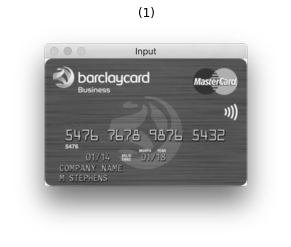

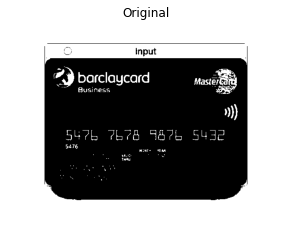

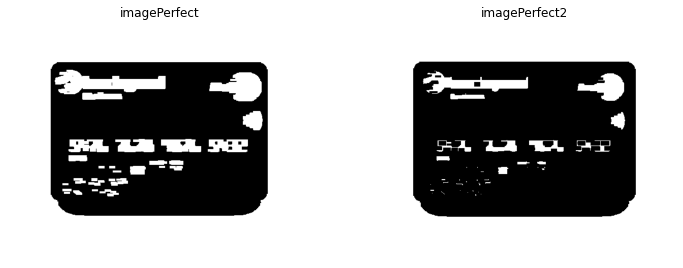

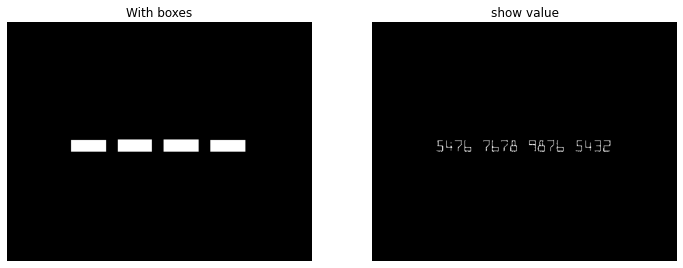

In [6]:
img = rgb2gray(io.imread('./img/card.jpg'))

show_images([img])

img = 1.0 * (img > img.max() / 1.4)

imagePerfect = binary_dilation(img, np.ones((4,12)))
imagePerfect2 = binary_erosion(imagePerfect, np.ones( (4,12) ) )

contours = find_contours(imagePerfect2, 0.8)

with_boxes  = np.zeros(imagePerfect2.shape, dtype=float)

bounding_boxes = []

for contour in contours:
    Xmin = int(np.min(contour[:,1]))
    Xmax = int(np.max(contour[:,1]))
    Ymin = int(np.min(contour[:,0]))
    Ymax = int(np.max(contour[:,0]))
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    if(abs(Xmax-Xmin)/abs(Ymax-Ymin) >= 2.8 and abs(Xmax-Xmin)/abs(Ymax-Ymin) <= 3.24 and abs(Xmax-Xmin) > 40):
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=with_boxes.shape)
        with_boxes[rr, cc] = 1 #set color white

show_images([img], ["Original"])
show_images([imagePerfect, imagePerfect2], ["imagePerfect", "imagePerfect2"])
show_images([with_boxes , with_boxes * img], ["With boxes", "show value"])

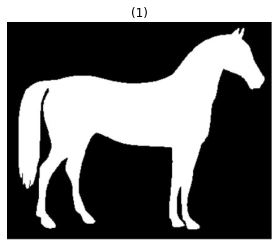

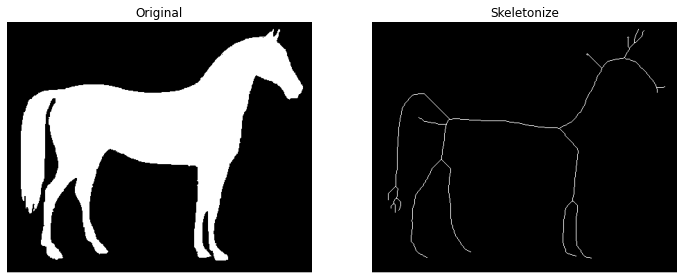

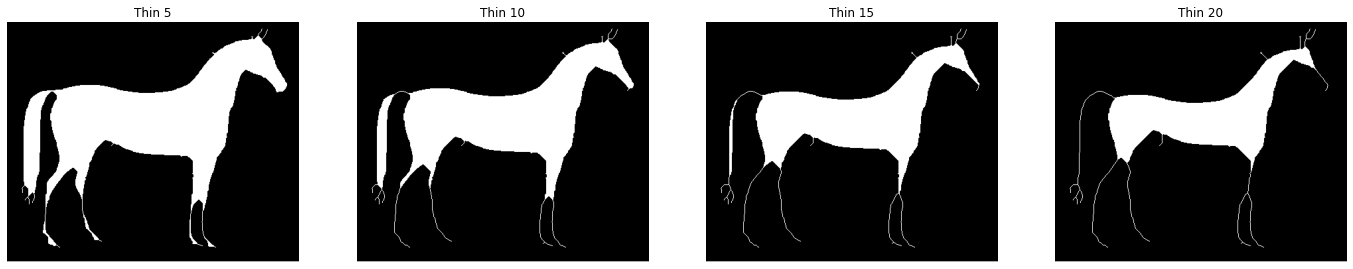

In [4]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = rgb2gray(io.imread('./img/horse.jpg'))

show_images([img])

img = 1.0 * (img > img.max() * 0.9)

imgSkel = skeletonize(img)

imgThin5 = thin(img, 5)

imgThin10 = thin(img, 10)

imgThin15 = thin(img, 15)

imgThin20 = thin(img, 20)

show_images([img, imgSkel], ["Original", "Skeletonize"])

show_images([imgThin5, imgThin10, imgThin15, imgThin20], ["Thin 5", "Thin 10", "Thin 15", "Thin 20"])
